# **Imbalance Data**

## 1. Muat Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTEN
from mlxtend.plotting import plot_decision_regions

# Muat data
df = pd.read_csv('iris.csv')


print("Distribusi Kelas Awal:")
print(df['species'].value_counts())

Distribusi Kelas Awal:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## 2. Membuat Dataset Tidak Seimbang

In [2]:
df_setosa = df[df['species'] == 'Iris-setosa']
df_versicolor = df[df['species'] == 'Iris-versicolor']
df_virginica = df[df['species'] == 'Iris-virginica']

# Ambil hanya 15 sampel dari setosa
df_setosa_reduced = df_setosa.sample(n=15, random_state=42)

# Gabungkan kembali data
df_imbalanced = pd.concat([df_setosa_reduced, df_versicolor, df_virginica], axis=0).reset_index(drop=True)

print("Distribusi Kelas Setelah Pengurangan (Tidak Seimbang):")
print(df_imbalanced['species'].value_counts())

Distribusi Kelas Setelah Pengurangan (Tidak Seimbang):
species
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        15
Name: count, dtype: int64


## 3. Klasifikasi & Plot PCA pada Data Tidak Seimbang

In [3]:
# Definisikan kamus untuk mapping nama spesies ke angka
species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

# Ambil semua 4 fitur untuk diproses PCA
X_features = df_imbalanced[['sepal length', 'sepal width', 'petal length', 'petal width']]
y_imbalanced = df_imbalanced['species']
y_imbalanced_int = y_imbalanced.map(species_map).values

# Terapkan PCA langsung
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_features)

# Split data hasil PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_imbalanced_int, test_size=0.3, random_state=42, stratify=y_imbalanced_int)

# Latih model pada data PCA
model_imbalanced_pca = LogisticRegression(random_state=42)
model_imbalanced_pca.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model_imbalanced_pca.predict(X_test)
print("--- Hasil pada Data Tidak Seimbang (PCA) ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=species_map.keys()))



--- Hasil pada Data Tidak Seimbang (PCA) ---
Akurasi: 0.9714285714285714

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.97        35
      macro avg       0.98      0.98      0.98        35
   weighted avg       0.97      0.97      0.97        35



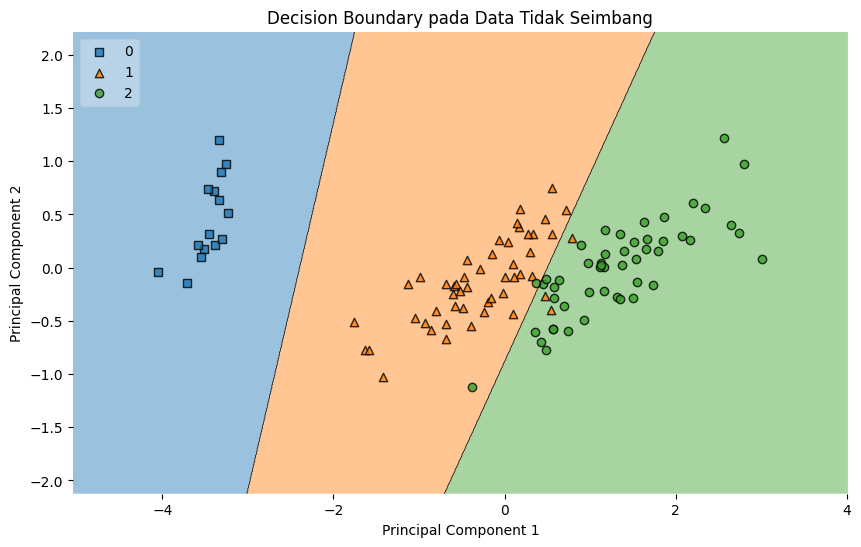

In [4]:
# Plotting decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(X_pca, y_imbalanced_int, clf=model_imbalanced_pca, legend=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary pada Data Tidak Seimbang')
plt.show()

## 4. Menyeimbangkan Dataset dengan SMOTEN

In [5]:
# SMOTEN butuh k_neighbors lebih kecil dari sampel kelas minoritas (5)
smoten = SMOTEN(random_state=42, k_neighbors=5)

# fit pada data fitur dan target yang belum di-PCA
X_resampled, y_resampled = smoten.fit_resample(X_features, y_imbalanced)

# Buat DataFrame baru yang sudah seimbang
df_balanced = pd.DataFrame(X_resampled, columns=X_features.columns)
df_balanced['species'] = y_resampled

print("Distribusi Kelas Setelah SMOTEN (Seimbang):")
print(df_balanced['species'].value_counts())

Distribusi Kelas Setelah SMOTEN (Seimbang):
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## 5. Klasifikasi & Plot PCA pada Data Seimbang

--- Hasil pada Data Seimbang (PCA) ---
Akurasi: 0.9111111111111111

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.82      0.93      0.88        15
 Iris-virginica       0.92      0.80      0.86        15

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.92      0.91      0.91        45



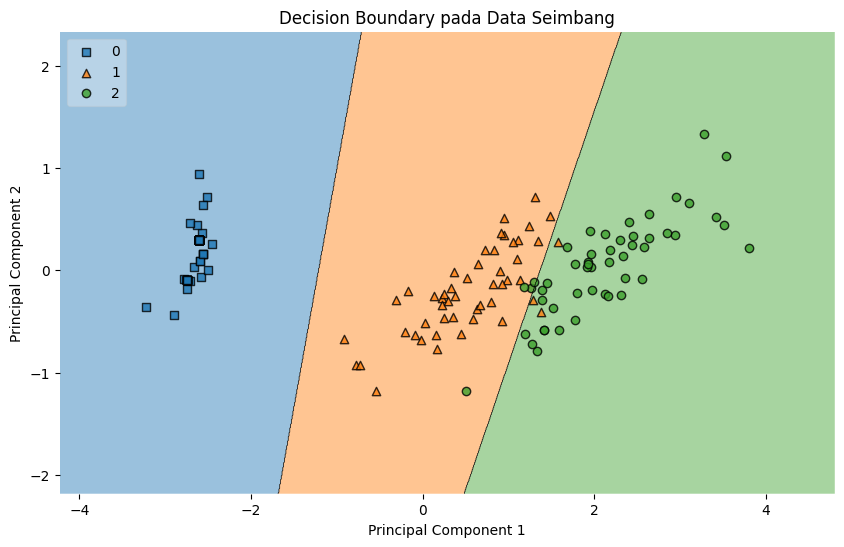

In [6]:
# Ambil semua 4 fitur dari data yang sudah seimbang
X_balanced_features = df_balanced[['sepal length', 'sepal width', 'petal length', 'petal width']]
y_balanced = df_balanced['species']
y_balanced_int = y_balanced.map(species_map).values

# Terapkan PCA langsung
pca_bal = PCA(n_components=2)
X_pca_balanced = pca_bal.fit_transform(X_balanced_features)

# Split data hasil PCA
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_pca_balanced, y_balanced_int, test_size=0.3, random_state=42, stratify=y_balanced_int)

# Latih model pada data PCA
model_balanced_pca = LogisticRegression(random_state=42)
model_balanced_pca.fit(X_train_b, y_train_b)

# Prediksi dan evaluasi
y_pred_b = model_balanced_pca.predict(X_test_b)
print("--- Hasil pada Data Seimbang (PCA) ---")
print(f"Akurasi: {accuracy_score(y_test_b, y_pred_b)}")
print("\nClassification Report:\n", classification_report(y_test_b, y_pred_b, target_names=species_map.keys()))

# Plotting decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(X_pca_balanced, y_balanced_int, clf=model_balanced_pca, legend=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary pada Data Seimbang')
plt.show()